#OmdenaAI UAE Chapter: Feature Visualization using CNN

## Gathering Resources

In [ ]:
!git clone -b dataset https://github.com/OmdenaAI/uae-chapter-retina-stages-detection

Cloning into 'uae-chapter-retina-stages-detection'...
remote: Enumerating objects: 2092, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 2092 (delta 27), reused 0 (delta 0), pack-reused 2038
Receiving objects: 100% (2092/2092), 126.51 MiB | 45.07 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

## Loading data

In [ ]:
import os
os.rename("/content/uae-chapter-retina-stages-detection/src/data/Project_data/test/health", "/content/uae-chapter-retina-stages-detection/src/data/Project_data/test/healthy")

In [ ]:
train_directory = "/content/uae-chapter-retina-stages-detection/src/data/Project_data/train/"
test_directory = "/content/uae-chapter-retina-stages-detection/src/data/Project_data/train/"

train = keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

test = keras.utils.image_dataset_from_directory(
    test_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2009 files belonging to 2 classes.
Using 1608 files for training.
Found 2009 files belonging to 2 classes.
Using 401 files for validation.


## Training the model on data

In [ ]:
image_size = (256, 256, 1)

In [ ]:
#This model was shared by Malitha Gunawardhana in notebook titled "oct_ret_2nd_code-colab.ipynb"
def model():
    filters = 60
    sizeoffilter1 = (5, 5)
    sizeoffilter2 = (4, 4)
    sizeoffilter3 = (3, 3)
    sizeofpool = (2, 2)
   

    model = Sequential();
    model.add((Conv2D(filters, sizeoffilter1, input_shape=(image_size[0], image_size[1], 1), activation="relu")))

    model.add((Conv2D(filters, sizeoffilter1, activation="relu")))
    model.add((Conv2D(filters//2, sizeoffilter2, activation="relu")))
    model.add((Conv2D(filters//2, sizeoffilter2, activation="relu")))
    model.add(MaxPooling2D(pool_size=sizeofpool))
    model.add(Dropout(0.2))

    model.add((Conv2D(filters, sizeoffilter1, activation="relu")))
    model.add((Conv2D(filters//2, sizeoffilter2, activation="relu")))
    model.add((Conv2D(filters//2, sizeoffilter2, activation="relu")))
    model.add(MaxPooling2D(pool_size=sizeofpool))
    model.add(Dropout(0.2))

    model.add((Conv2D(filters, sizeoffilter2, activation="relu")))
    model.add(MaxPooling2D(pool_size=sizeofpool))
    model.add((Conv2D(filters//2, sizeoffilter3, activation="relu")))
    model.add((Conv2D(filters//2, sizeoffilter3, activation="relu")))
    model.add(MaxPooling2D(pool_size=sizeofpool))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(5000, activation="relu", kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation="softmax"))

    model.compile(Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

    return model
  
model = model()

In [ ]:
model.fit(train, epochs=11, validation_data=test, batch_size=32,)

Epoch 1/11
51/51 [==============================] - 24s 454ms/step - loss: 0.8875 - accuracy: 0.5889 - val_loss: 0.6552 - val_accuracy: 0.6633
Epoch 2/11
51/51 [==============================] - 24s 455ms/step - loss: 0.5908 - accuracy: 0.6872 - val_loss: 0.5618 - val_accuracy: 0.7581
Epoch 3/11
51/51 [==============================] - 23s 454ms/step - loss: 0.5070 - accuracy: 0.7805 - val_loss: 0.4401 - val_accuracy: 0.8155
Epoch 4/11
51/51 [==============================] - 23s 451ms/step - loss: 0.4684 - accuracy: 0.7960 - val_loss: 0.4180 - val_accuracy: 0.8080
Epoch 5/11
51/51 [==============================] - 24s 455ms/step - loss: 0.4349 - accuracy: 0.8041 - val_loss: 0.4316 - val_accuracy: 0.8105
Epoch 6/11
51/51 [==============================] - 23s 451ms/step - loss: 0.3688 - accuracy: 0.8389 - val_loss: 0.3080 - val_accuracy: 0.8803
Epoch 7/11
51/51 [==============================] - 24s 455ms/step - loss: 0.2916 - accuracy: 0.8775 - val_loss: 0.2424 - val_accuracy: 0.9177

## Feature Visualization

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def plot_features(img_path):
    #SOURCE: https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c?gi=b682fe36c805
    #Sourced and Modified
    # Define a new Model, Input= image 
    # Output= intermediate representations for all layers in the  
    # previous model after the first.
    successive_outputs = [layer.output for layer in model.layers[1:]]
    #visualization_model = Model(img_input, successive_outputs)
    visualization_model = keras.models.Model(inputs = model.input, outputs = successive_outputs)
    #Load the input image
    img = Image.open(img_path)
    img = img.resize((256, 256,))
    # Convert ht image to Array of dimension (150,150,3)
    x = np.array(img)                           
    x = x.reshape((1,) + x.shape)
    # Rescale by 1/255
    x = x.astype(float)/255.0
    # Let's run input image through our vislauization network
    # to obtain all intermediate representations for the image.
    successive_feature_maps = visualization_model.predict(x)
    # Retrieve are the names of the layers, so can have them as part of our plot
    layer_names = [layer.name for layer in model.layers]
    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
      print(feature_map.shape)
      if len(feature_map.shape) == 4:
        
        # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
      
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
        
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        
        # Postprocess the feature to be visually palatable
        for i in range(n_features):
          x  = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std ()
          x *=  64
          x += 128
          x  = np.clip(x, 0, 255).astype('uint8')
          # Tile each filter into a horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

(1, 248, 248, 60)
(1, 245, 245, 30)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


(1, 242, 242, 30)
(1, 121, 121, 30)
(1, 121, 121, 30)
(1, 117, 117, 60)
(1, 114, 114, 30)
(1, 111, 111, 30)
(1, 55, 55, 30)
(1, 55, 55, 30)
(1, 52, 52, 60)
(1, 26, 26, 60)
(1, 24, 24, 30)
(1, 22, 22, 30)
(1, 11, 11, 30)
(1, 11, 11, 30)
(1, 3630)
(1, 5000)
(1, 5000)
(1, 2)


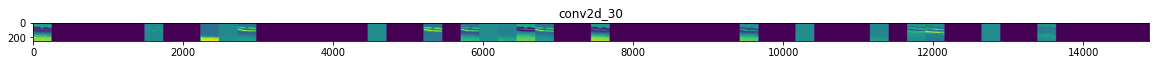

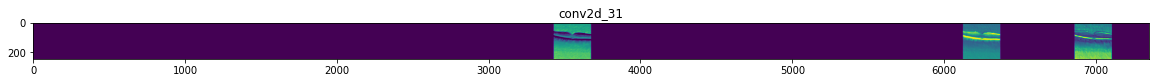

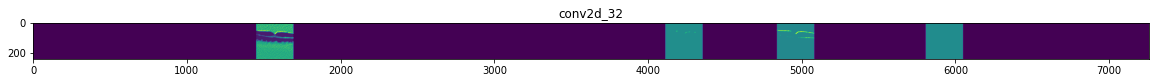

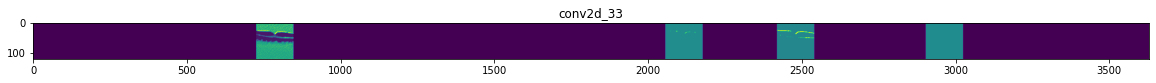

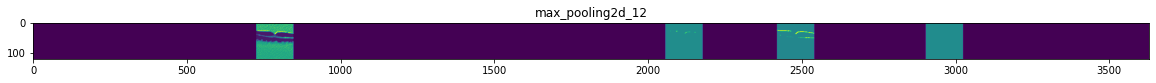

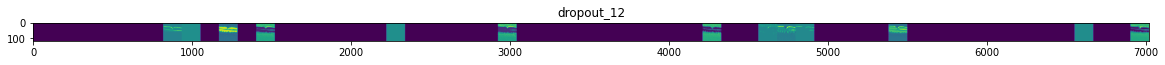

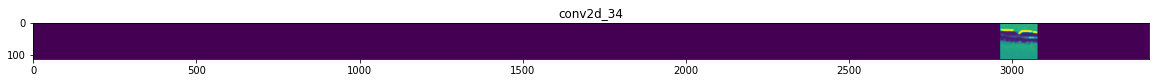

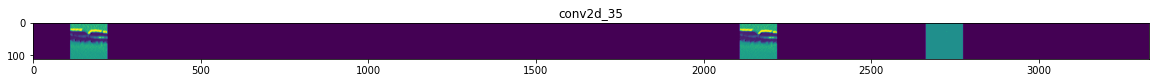

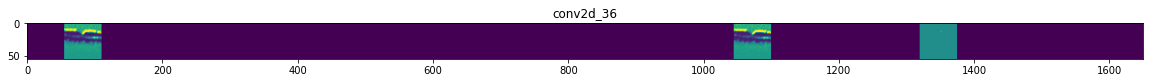

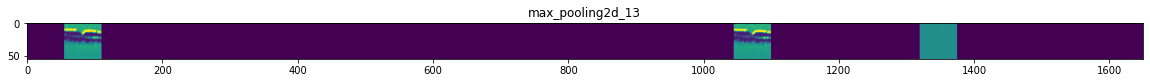

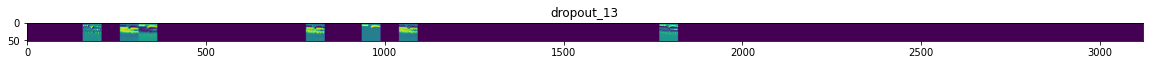

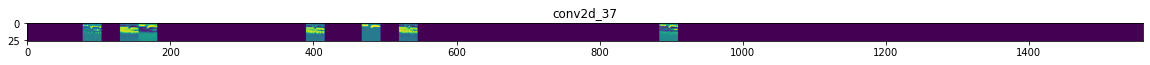

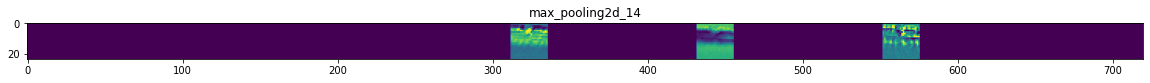

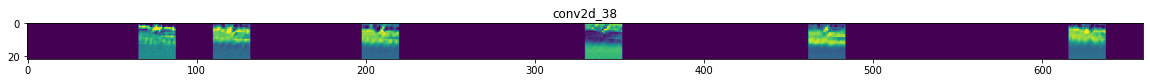

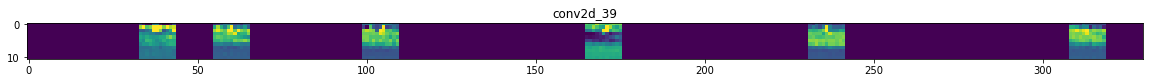

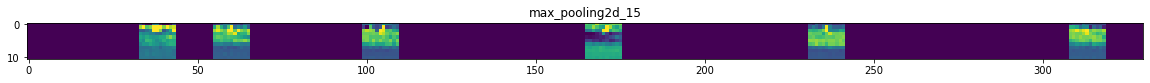

In [ ]:
healthy_image_path = "/content/uae-chapter-retina-stages-detection/src/data/Project_data/train/healthy/NORMAL-100580-4.jpeg"
plot_features(healthy_image_path)

(1, 248, 248, 60)
(1, 245, 245, 30)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


(1, 242, 242, 30)
(1, 121, 121, 30)
(1, 121, 121, 30)
(1, 117, 117, 60)
(1, 114, 114, 30)
(1, 111, 111, 30)
(1, 55, 55, 30)
(1, 55, 55, 30)
(1, 52, 52, 60)
(1, 26, 26, 60)
(1, 24, 24, 30)
(1, 22, 22, 30)
(1, 11, 11, 30)
(1, 11, 11, 30)
(1, 3630)
(1, 5000)
(1, 5000)
(1, 2)


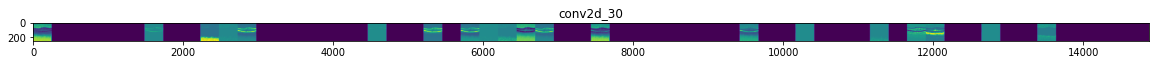

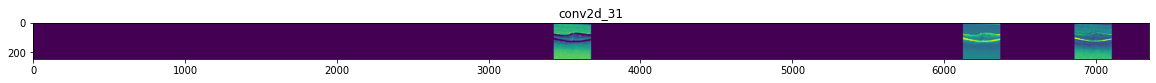

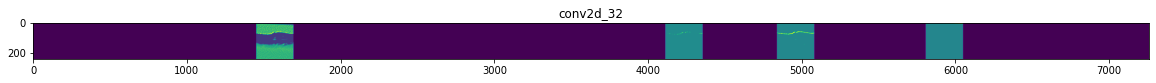

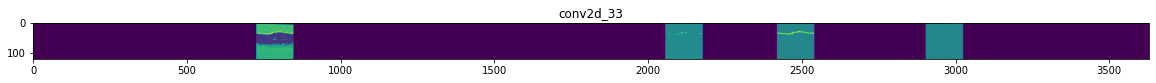

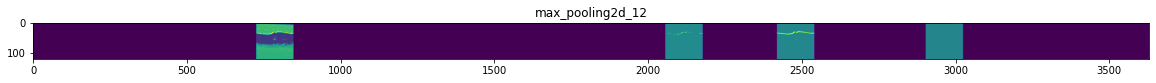

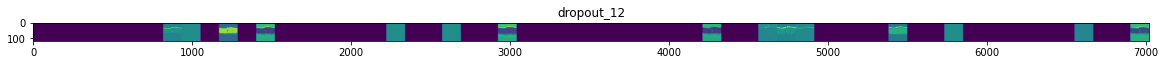

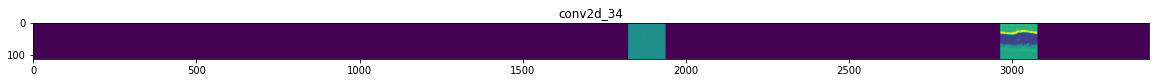

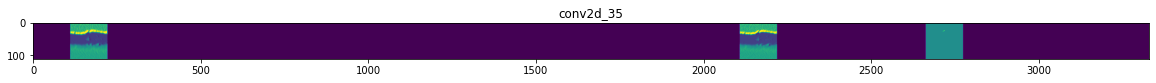

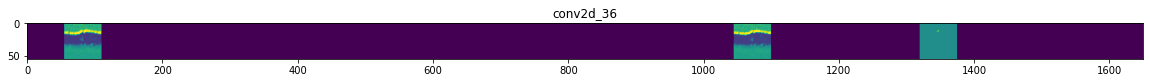

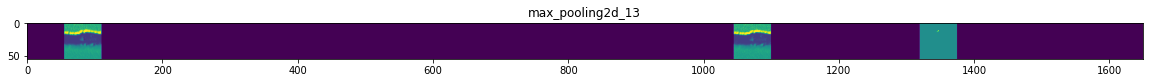

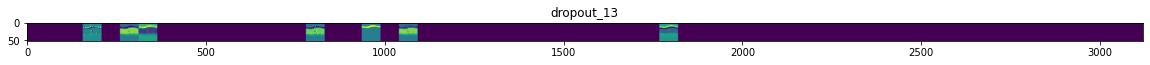

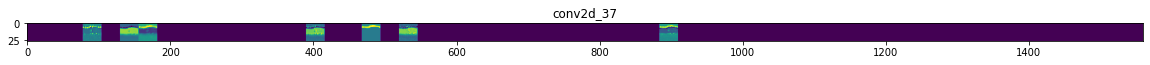

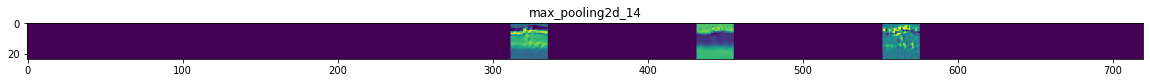

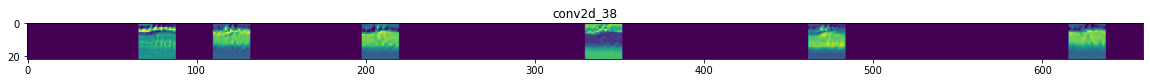

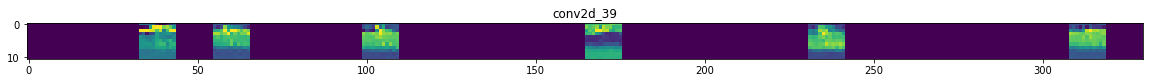

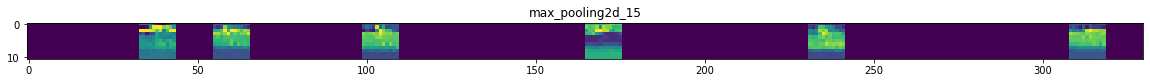

In [ ]:
dme_image_path = "/content/uae-chapter-retina-stages-detection/src/data/Project_data/train/DME/DME-119840-10.jpeg"
plot_features(dme_image_path)

In [ ]:
def plot_features_from_selected_layers(img_path, modellayers):
    #SOURCE: https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c?gi=b682fe36c805
    #Sourced and Modified
    # Define a new Model, Input= image 
    # Output= intermediate representations for all layers in the  
    # previous model after the first.
    successive_outputs = [layer.output for layer in model.layers[1:]]
    #visualization_model = Model(img_input, successive_outputs)
    visualization_model = keras.models.Model(inputs = model.input, outputs = successive_outputs)
    #Load the input image
    img = Image.open(img_path)
    img = img.resize((256, 256,))
    # Convert ht image to Array of dimension (150,150,3)
    x = np.array(img)                           
    x = x.reshape((1,) + x.shape)
    # Rescale by 1/255
    x = x.astype(float)/255.0
    # Let's run input image through our vislauization network
    # to obtain all intermediate representations for the image.
    successive_feature_maps = visualization_model.predict(x)
    # Retrieve are the names of the layers, so can have them as part of our plot
    layer_names = [layer.name for layer in model.layers]
    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
        if layer_name in modellayers:
            print(feature_map.shape)
            if len(feature_map.shape) == 4:
              
              # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
            
              n_features = feature_map.shape[-1]  # number of features in the feature map
              size = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
              
              # We will tile our images in this matrix
              display_grid = np.zeros((size, size * n_features))
              
              # Postprocess the feature to be visually palatable
              for i in range(n_features):
                  x  = feature_map[0, :, :, i]
                  x -= x.mean()
                  x /= x.std ()
                  x *=  64
                  x += 128
                  x  = np.clip(x, 0, 255).astype('uint8')
                  # Tile each filter into a horizontal grid
                  display_grid[:, i * size : (i + 1) * size] = x
          # Display the grid
              scale = 20. / n_features
              plt.figure( figsize=(40, 2))
              plt.title ( layer_name )
              plt.grid  ( False )
              plt.imshow( display_grid, aspect='auto', cmap='viridis' )

## Comparing the features of healthy nerve fibre and the one with DME

(1, 242, 242, 30)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


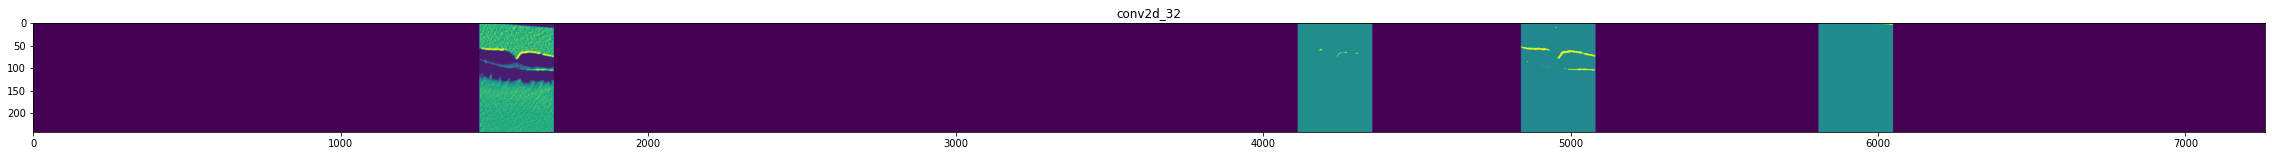

In [ ]:
plot_features_from_selected_layers(healthy_image_path, "conv2d_32")

(1, 242, 242, 30)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


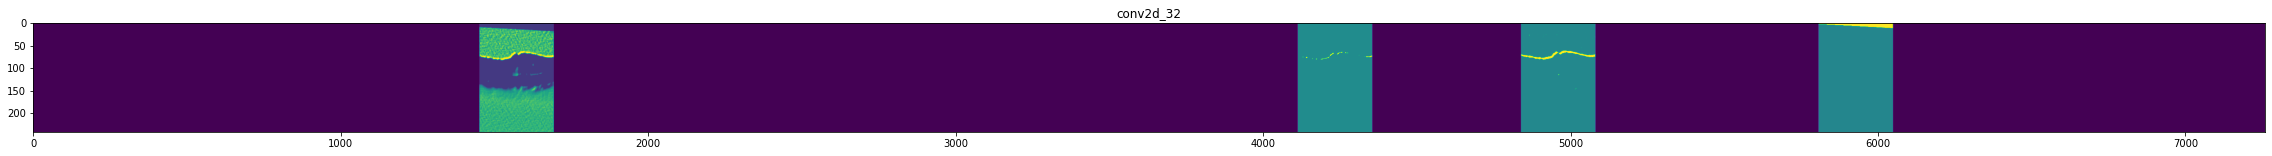

In [ ]:
plot_features_from_selected_layers(dme_image_path, "conv2d_32")